In [5]:
import numpy as np
import matplotlib.pyplot as plt

# (c)

In [9]:
def State(T): 
    t=np.linspace(0,T,T+1)
    n=len(t)
    x=np.zeros(n)
    x[0]=np.random.normal(0,1,1)
    error_1=np.random.normal(0,0.5,n)
    y=np.zeros(n)
    for i in range(1,n):
        x[i]=0.7*x[i-1]+error_1[i]
    return x,t
T=100
x,t= State(T)

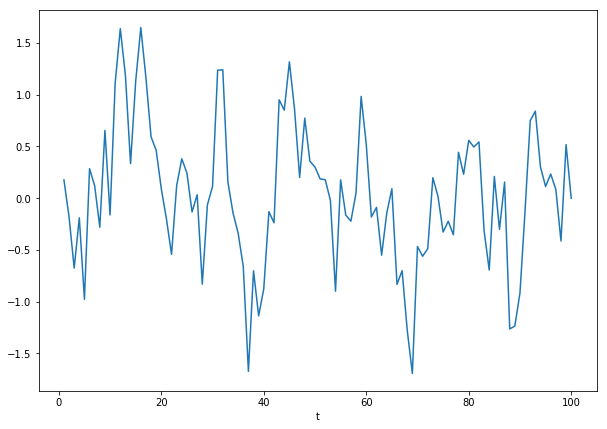

In [10]:
plt.figure(figsize=(10,7))
plt.plot(t[1:],x[1:])
plt.xlabel("t")
plt.show()

# (d)

In [11]:
P=np.linspace(1,100,100)

In [12]:
j=[39,40,41,42,79,80,81,82]
t2=np.delete(P,j)

In [15]:
def Model(t2):
    N=len(t2)
    y=np.zeros(N)
    error_y=np.random.normal(0,0.1,N)
    for i in range(1,N):
        y[i]=x[int(t2[i])]+error_y[i]
    return y
y=Model(t2)

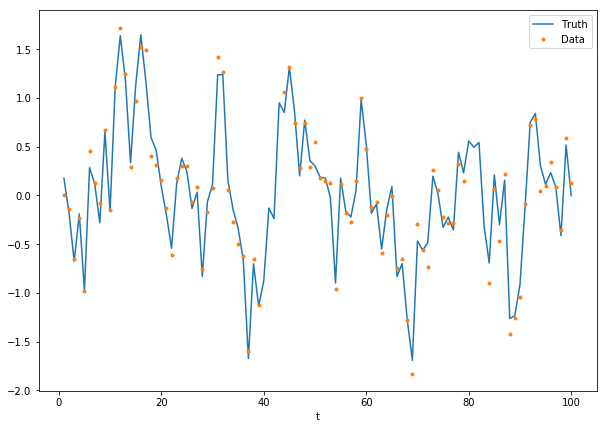

In [17]:
plt.figure(figsize=(10,7))
plt.plot(t[1:],x[1:])
plt.plot(t2,y,".")
plt.xlabel("t")
plt.legend(["Truth","Data"])
plt.show()

# (e)

In [18]:
def kalman_filter(sigma,mean,r2,q2,alpha,H):
    gain_matrix=np.zeros(len(t2))
    mean_new=np.zeros(len(t2))
    sigma_new=np.zeros(len(t2))
    mean_old=alpha*mean
    sigma_old=q2+alpha*sigma*alpha
    for i in range(1,len(t2)):
        gain_matrix[i]=sigma_old*H*(H*sigma_old*H+r2)**(-1)
        sigma_new[i]=(1-gain_matrix[i]*H)*sigma_old
        mean_new[i]=mean_old+gain_matrix[i]*(y[i]-H*mean_old)
        mean_old=alpha*mean_new[i]
        sigma_old=q2+(alpha**2)*sigma_new[i]
    return sigma_new, mean_new, gain_matrix

In [19]:
sigma=0.1
mean=0
r2=0.1
q2=0.5
alpha=0.7
H=1
Sigma_new,Mu_new,gain_Matrix=kalman_filter(sigma,mean,r2,q2,alpha,H)

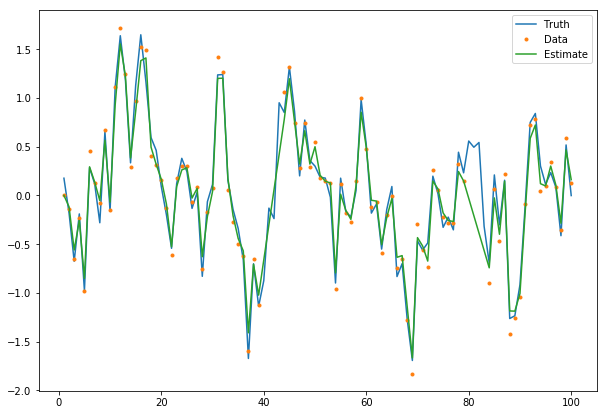

In [20]:
plt.figure(figsize=(10,7))
plt.plot(t[1:],x[1:])
plt.plot(t2,y,".")
plt.plot(t2,Mu_new)
plt.legend(["Truth","Data","Estimate"])
plt.show()